<a href="https://colab.research.google.com/github/jalvarez2410/Python/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se le provee un archivo csv (Samsung Dataset.csv) con los datos de Samsung Electronics Co., Ltd., una subsidiaria principal del Grupo Samsung, que es líder en tecnología y electrónica de consumo. El conjunto de datos proporciona un registro de los cambios en el precio de las acciones de Samsung Electronics desde el año 2000. Este incluye las siguientes columnas:

- Date: fecha de transacción
- Open: precio de apertura de la acción de Samsung del día en específico
- High: precio más alto de la acción
- Low: precio más bajo de la acción
- Close: precio de cierre
- Adj close: precio de cierre ajustado (toma en cuenta cualquier otro parámetro que podría afectar al precio de la acción después del cierre
- Volume: volumen de transacción; cantidad de todas las transacciones

1. Estadísticas. Realice un análisis detallado de los datos históricos diarios de Samsung Electronics para calcular promedios, percentiles y correlaciones entre el precio de cierre de las acciones y otras variables económicas relevantes.

2. Visualización. Utilice gráficos adecuados para interpetar visualmente los datos. Incluya gráficos de tendencia, gráficos de dispersión para visualizar correlaciones entre dos variables, gráficos de caja (o histogramas) para representar distribuciones y cualquier otro gráfico que ayude a entender la relación entre las variables y los precios de las acciones.

3. Reporte de interpretación. Prepare un reporte breve y claro (en el formato que desee) para presentar sus hallazgos y la interpretración de las estadísticas obtenidas. Enfóquese en explicar claramente las relaciones observadas entre el precio de cierre de las acciones y las variables analizadas. Destaque cualquier tendencia, patrón o anomalía que haya identificado en los datos.


#Parte 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Python/Taller Nine Hub_0624/Bases de datos/Base de datos_Tarea 5.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [3]:
df.shape

(6127, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.0,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.0,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.0,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.0,19246725
6126,2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6127 non-null   object 
 1   Open       6127 non-null   float64
 2   High       6127 non-null   float64
 3   Low        6127 non-null   float64
 4   Close      6127 non-null   float64
 5   Adj Close  6127 non-null   float64
 6   Volume     6127 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.2+ KB


In [25]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6.127000e+03
mean,28370.058756,28644.142321,28084.267994,28360.006528,24504.066849,2.117578e+07
std,22589.409269,22764.800972,22394.681276,22567.361619,22041.302899,1.505888e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,1988.168701,0.000000e+00
25%,10700.000000,10900.000000,10560.000000,10720.000000,7901.645264,1.169668e+07
50%,21020.000000,21420.000000,20740.000000,21060.000000,16245.702148,1.715000e+07
75%,45590.000000,46100.000000,45170.000000,45590.000000,39041.779297,2.620915e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,85300.000000,1.642150e+08


In [8]:
df=df.drop(["Date"], axis=1)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6127 non-null   float64
 1   High       6127 non-null   float64
 2   Low        6127 non-null   float64
 3   Close      6127 non-null   float64
 4   Adj Close  6127 non-null   float64
 5   Volume     6127 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 287.3 KB


In [10]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999888,0.999914,0.999782,0.996265,-0.371244
High,0.999888,1.000000,0.999882,0.999906,0.996308,-0.368713
Low,0.999914,0.999882,1.000000,0.999902,0.996400,-0.373160
Close,0.999782,0.999906,0.999902,1.000000,0.996413,-0.371162
Adj Close,0.996265,0.996308,0.996400,0.996413,1.000000,-0.342241
Volume,-0.371244,-0.368713,-0.373160,-0.371162,-0.342241,1.000000


#Parte 2


<Axes: >

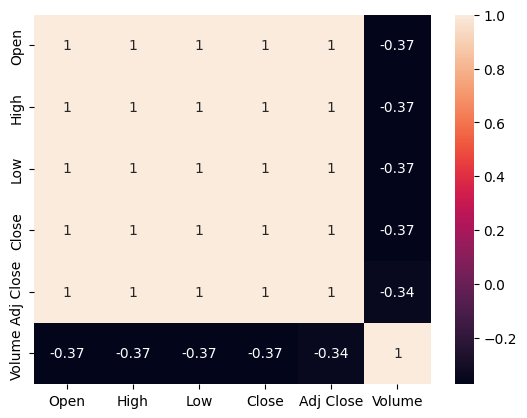

In [11]:
sns.heatmap(df.corr(), annot=True)

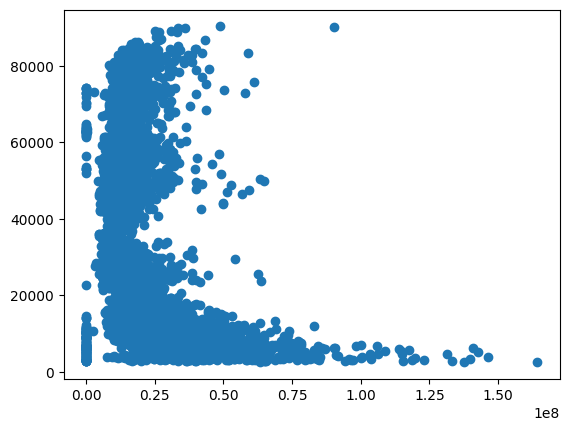

In [12]:
plt.scatter(df["Volume"], df["Open"])

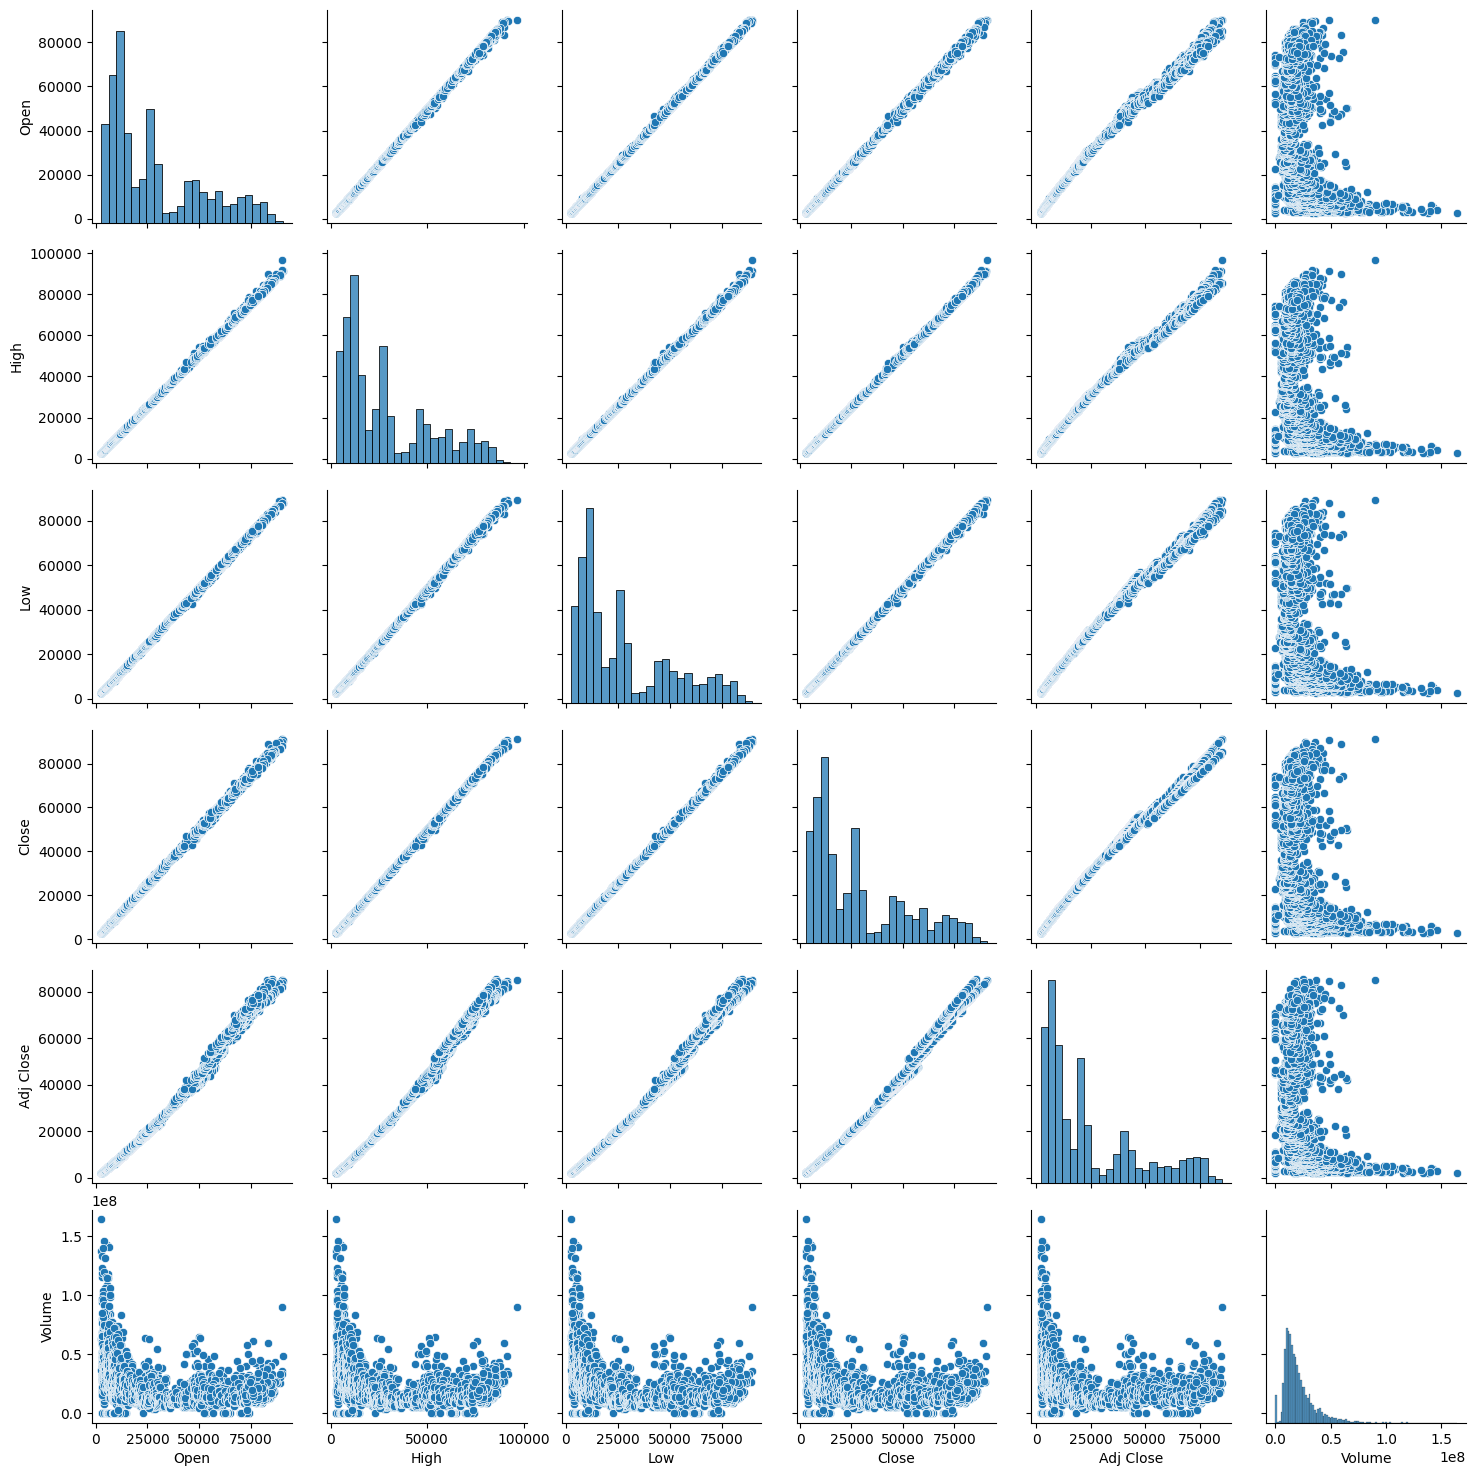

In [13]:
sns.pairplot(df)

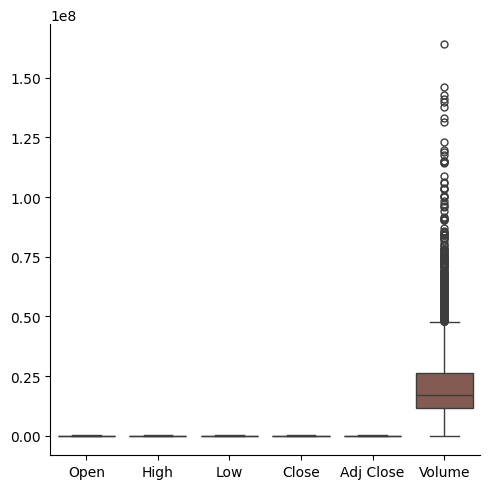

In [21]:
sns.catplot(data=df, kind="box")

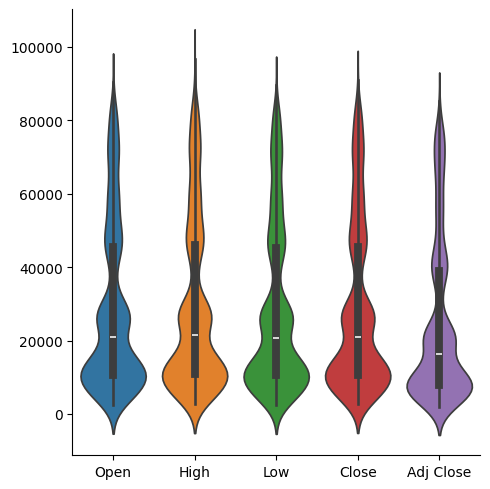

In [24]:
df_volume = df.drop(["Volume"], axis=1)
sns.catplot(data=df_volume, kind="violin")

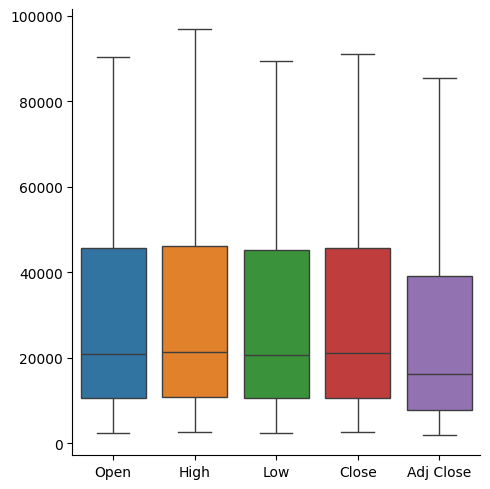

In [27]:
sns.catplot(data=df_volume, kind="box")